In [1]:
import quandl

In [214]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [3]:
quandl.ApiConfig.api_key = '1513txcURR4fYyP5VDU3'

In [26]:
start_date = '2017-01-01'
end_date = '2017-08-14'

In [27]:
data = quandl.get('BCHAIN/MKPRU', start_date=start_date, end_date=end_date)

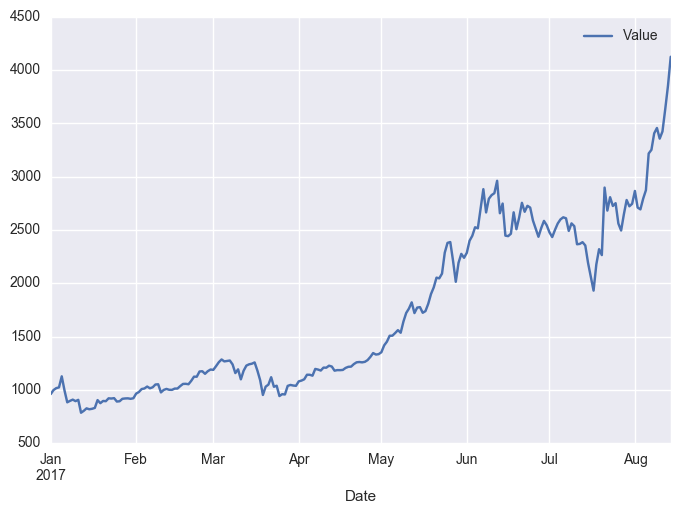

In [28]:
data.plot()

In [29]:
data.head()

,Value
Date,
2017-01-01,959.87
2017-01-02,997.72
2017-01-03,1015.97
2017-01-04,1023.14
2017-01-05,1126.76


In [42]:
data['MA10'] = data['Value'].rolling(10).mean()
data['MA21'] = data['Value'].rolling(21).mean()

/Users/lucasosouza/anaconda/envs/udacity/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/lucasosouza/anaconda/envs/udacity/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [43]:
data = data.dropna()

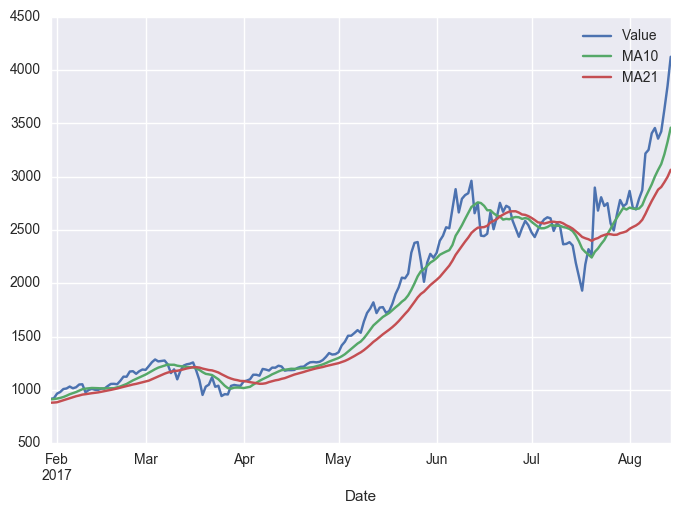

In [46]:
data.plot()

In [47]:
data.head()

,Value,MA10,MA21
Date,,,
2017-01-30,915.93,910.955,879.518571
2017-01-31,921.17,913.710,880.803810
2017-02-01,964.70,918.136,883.596667
2017-02-02,979.70,924.246,892.857619
2017-02-03,1007.61,932.800,902.583333


In [50]:
data['MA10'].shift(1).head()

Date
2017-01-30        NaN
2017-01-31    910.955
2017-02-01    913.710
2017-02-02    918.136
2017-02-03    924.246
Name: MA10, dtype: float64

In [67]:
# 
data['MA10prev'] = data['MA10'].shift(1)
data['MA21prev'] = data['MA21'].shift(1)


In [68]:
data.tail()

,Value,MA10,MA21,MA10prev,MA21prev
Date,,,,,
2017-08-10,3357.32,3063.101,2878.574286,3001.964,2826.547619
2017-08-11,3424.40,3118.898,2903.632381,3063.101,2878.574286
2017-08-12,3632.50,3211.107,2948.885238,3118.898,2903.632381
2017-08-13,3852.80,3327.024,2998.656667,3211.107,2948.885238
2017-08-14,4125.54,3460.167,3065.323333,3327.024,2998.656667


In [140]:
def macd_buy(row):
    ma_short = row['MA10']
    ma_long =  row['MA21']
    ma_short_prev = row['MA10prev']
    ma_long_prev = row['MA21prev']
    price = row['Value']
    if (ma_short_prev <= ma_long_prev) and (ma_short >= ma_long):
        return price
    return 0

In [141]:
def macd_sell(row):
    ma_short = row['MA10']
    ma_long =  row['MA21']
    ma_short_prev = row['MA10prev']
    ma_long_prev = row['MA21prev']
    price = row['Value']
    if (ma_long_prev <= ma_short_prev) and (ma_long >= ma_short):
        return price
    return 0

In [142]:
data['macd_buy'] = data.apply(macd_buy, axis=1)
data['macd_sell'] = data.apply(macd_sell, axis=1)

In [143]:
data.tail()

,Value,MA10,MA21,MA10prev,MA21prev,macd,macd_buy,macd_sell
Date,,,,,,,,
2017-08-10,3357.32,3063.101,2878.574286,3001.964,2826.547619,0,0.0,0.0
2017-08-11,3424.40,3118.898,2903.632381,3063.101,2878.574286,0,0.0,0.0
2017-08-12,3632.50,3211.107,2948.885238,3118.898,2903.632381,0,0.0,0.0
2017-08-13,3852.80,3327.024,2998.656667,3211.107,2948.885238,0,0.0,0.0
2017-08-14,4125.54,3460.167,3065.323333,3327.024,2998.656667,0,0.0,0.0


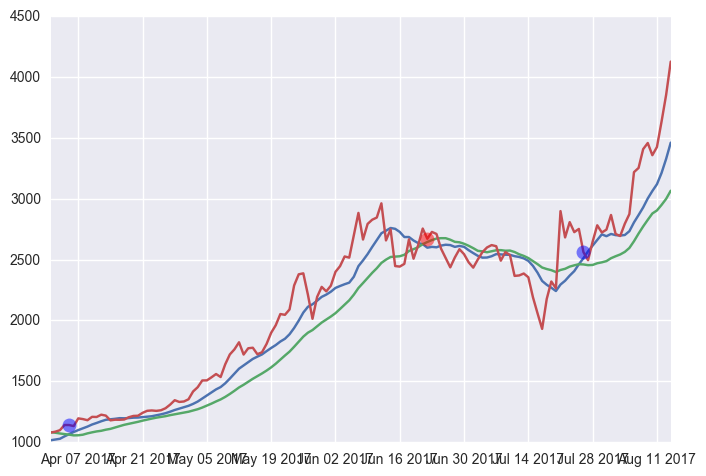

In [156]:
data_plot = data.ix['2017-04':'2017-08']
plt.plot(data_plot['MA10'])
plt.plot(data_plot['MA21'])
plt.plot(data_plot['Value'])
plt.plot(data_plot.loc[data['macd_buy'] != 0, 'macd_buy'], marker='o', alpha=.5, ms=10, ls=' ', color='blue')
plt.plot(data_plot.loc[data['macd_sell'] != 0, 'macd_sell'], marker='o', alpha=.5, ms=10, ls=' ', color='red')
plt.figure(figsize=(2,2))
# plt.xlim((0,4000))
plt.show()

In [186]:
from datetime import datetime as dt
for row in data.iterrows():
    print(dt.strftime(row[0],'%Y-%m-%d') == '2017-01-30')
    break

True


In [197]:
   

initial_amount = 10000
amount = initial_amount
bitcoins = 0
for row in data.iterrows():
    if amount > 0 and row[1]['macd_buy']>0:
        print('buy')
        bitcoins = amount/row[1]['Value']
        amount = 0        
    if bitcoins > 0 and row[1]['macd_sell']>0:
        print('sell')
        amount = bitcoins * row[1]['Value']
        bitcoins = 0
    if to_date(row[0]) == '2017-08-14':
        print('end')
        amount = bitcoins * row[1]['Value']
        bitcoins = 0
        

buy
sell
buy
end


In [198]:
amount, initial_amount, amount/initial_amount - 1

(37691.146774870998, 10000, 2.7691146774870998)

In [201]:
data.head()

,Value,MA10,MA21,MA10prev,MA21prev,macd,macd_buy,macd_sell
Date,,,,,,,,
2017-01-30,915.93,910.955,879.518571,NaN,NaN,0,0.0,0.0
2017-01-31,921.17,913.710,880.803810,910.955,879.518571,0,0.0,0.0
2017-02-01,964.70,918.136,883.596667,913.710,880.803810,0,0.0,0.0
2017-02-02,979.70,924.246,892.857619,918.136,883.596667,0,0.0,0.0
2017-02-03,1007.61,932.800,902.583333,924.246,892.857619,0,0.0,0.0


In [202]:
initial_amount = 10000
amount = initial_amount
bitcoins = 0
for row in data.iterrows():
    if to_date(row[0]) == '2017-01-30':
        print('buy')
        bitcoins = amount/row[1]['Value']
        amount = 0        
    if to_date(row[0]) == '2017-08-14':
        print('end')
        amount = bitcoins * row[1]['Value']
        bitcoins = 0
        

buy
end


In [203]:
amount, initial_amount, amount/initial_amount - 1

(45042.088369198522, 10000, 3.5042088369198519)

In [270]:
def to_date(d):
    return dt.strftime(d,'%Y-%m-%d') 

def calc_macd(data, start_date, end_date):
    initial_amount = 10000
    amount = initial_amount
    bitcoins = 0
    buy_dates = []
    sell_dates = []
    for row in data.ix[start_date:end_date].iterrows():
        if amount > 0 and row[1]['macd_buy']>0:
            bitcoins = amount/row[1]['Value']
            amount = 0
            buy_dates.append(to_date(row[0]))
        if bitcoins > 0 and row[1]['macd_sell']>0:
            amount = bitcoins * row[1]['Value']
            bitcoins = 0
            sell_dates.append(to_date(row[0]))
        if to_date(row[0]) == end_date:
            amount = bitcoins * row[1]['Value']
            bitcoins = 0
            sell_dates.append(to_date(row[0]))
    return amount/initial_amount, (buy_dates, sell_dates)

def calc_baseline(data, start_date, end_date):
    initial_amount = 10000
    amount = initial_amount
    bitcoins = 0
    for row in data.iterrows():
        if to_date(row[0]) == start_date:
            bitcoins = amount/row[1]['Value']
            amount = 0        
        if to_date(row[0]) == end_date:
            amount = bitcoins * row[1]['Value']
            bitcoins = 0
    return amount/initial_amount

def macd_buy(row):
    ma_short = row['MA_short']
    ma_long =  row['MA_long']
    ma_short_prev = row['MA_short_prev']
    ma_long_prev = row['MA_long_prev']
    price = row['Value']
    if (ma_short_prev <= ma_long_prev) and (ma_short >= ma_long):
        return price
    return 0

def macd_sell(row):
    ma_short = row['MA_short']
    ma_long =  row['MA_long']
    ma_short_prev = row['MA_short_prev']
    ma_long_prev = row['MA_long_prev']
    price = row['Value']
    if (ma_long_prev <= ma_short_prev) and (ma_long >= ma_short):
        return price
    return 0

def create_moving_averages(data, short_days, long_days):
    data['MA_short'] = data['Value'].rolling(short_days).mean()
    data['MA_long'] = data['Value'].rolling(long_days).mean()
    data['MA_short_prev'] = data['MA_short'].shift(1)
    data['MA_long_prev'] = data['MA_long'].shift(1)
    data['macd_buy'] = data.apply(macd_buy, axis=1)
    data['macd_sell'] = data.apply(macd_sell, axis=1)
    return data


### Trying lots of values

In [313]:
start_date = '2015-01-01'
end_date = '2017-08-10'
data = quandl.get('BCHAIN/MKPRU', start_date=start_date, end_date=end_date)

In [314]:
short_mas = [5,6,7,8,9,10]
long_mas = [11,12,13,14,15,20,25,30,35,40]

In [315]:
results = pd.DataFrame(columns=['short_ma', 'long_ma', 'valuation'])

In [329]:
results = []
baseline = calc_baseline(data, start_date, end_date)
start_date = '2016-01-01'
end_date = '2016-12-31'
for short_ma in short_mas:
    for long_ma in long_mas:
        df = data.copy()
        df = create_moving_averages(df, short_ma, long_ma)
        macd, dates = calc_macd(df, start_date, end_date)
        beta = ((macd/baseline) - 1)
        results.append([short_ma, long_ma, macd, beta])
        

In [330]:
df_res = pd.DataFrame(results, columns=['ShortMA', 'LongMA', 'MACD', 'Beta'])

In [333]:
data.ix[start_date, 'Value'], data.ix[end_date, 'Value'], baseline

(429.33999999999997, 952.14999999999998, 2.2283440890060837)

In [336]:
df_res[df_res['Beta'] > -0.1]

,ShortMA,LongMA,MACD,Beta
9,5,40,2.207506,-0.009351
18,6,35,2.041463,-0.083865
28,7,35,2.039755,-0.084632
38,8,35,2.126437,-0.045732
48,9,35,2.010075,-0.097951
49,9,40,2.041202,-0.083982
58,10,35,2.086945,-0.063455
59,10,40,2.055270,-0.077669


In [335]:
df_res[df_res['Beta'] < 0]

,ShortMA,LongMA,MACD,Beta
0,5,11,1.534978,-0.311158
1,5,12,1.514440,-0.320374
2,5,13,1.682656,-0.244885
3,5,14,1.640939,-0.263606
4,5,15,1.824858,-0.181070
5,5,20,1.870655,-0.160518
6,5,25,1.594363,-0.284508
7,5,30,1.889574,-0.152028
8,5,35,2.004284,-0.100550
9,5,40,2.207506,-0.009351


### Experiments - comparing with Gekko

In [356]:
short_ma, long_ma = 10, 35
df = data.copy()
df = create_moving_averages(df, short_ma, long_ma)
macd, dates = calc_macd(df, start_date, end_date)
beta = ((macd/baseline) - 1)
short_ma, long_ma, macd, beta, dates[0], dates[1]

(10,
 35,
 2.086944515950548,
 -0.063454999500819786,
 ['2016-02-18', '2016-04-01', '2016-05-29', '2016-07-24', '2016-09-05'],
 ['2016-03-14', '2016-05-23', '2016-07-13', '2016-07-29', '2016-12-31'])

In [357]:
df.head()

,Value,MA_short,MA_long,MA_short_prev,MA_long_prev,macd_buy,macd_sell
Date,,,,,,,
2015-01-01,315.70,NaN,NaN,NaN,NaN,0.0,0.0
2015-01-02,316.15,NaN,NaN,NaN,NaN,0.0,0.0
2015-01-03,302.33,NaN,NaN,NaN,NaN,0.0,0.0
2015-01-04,270.93,NaN,NaN,NaN,NaN,0.0,0.0
2015-01-05,276.80,NaN,NaN,NaN,NaN,0.0,0.0


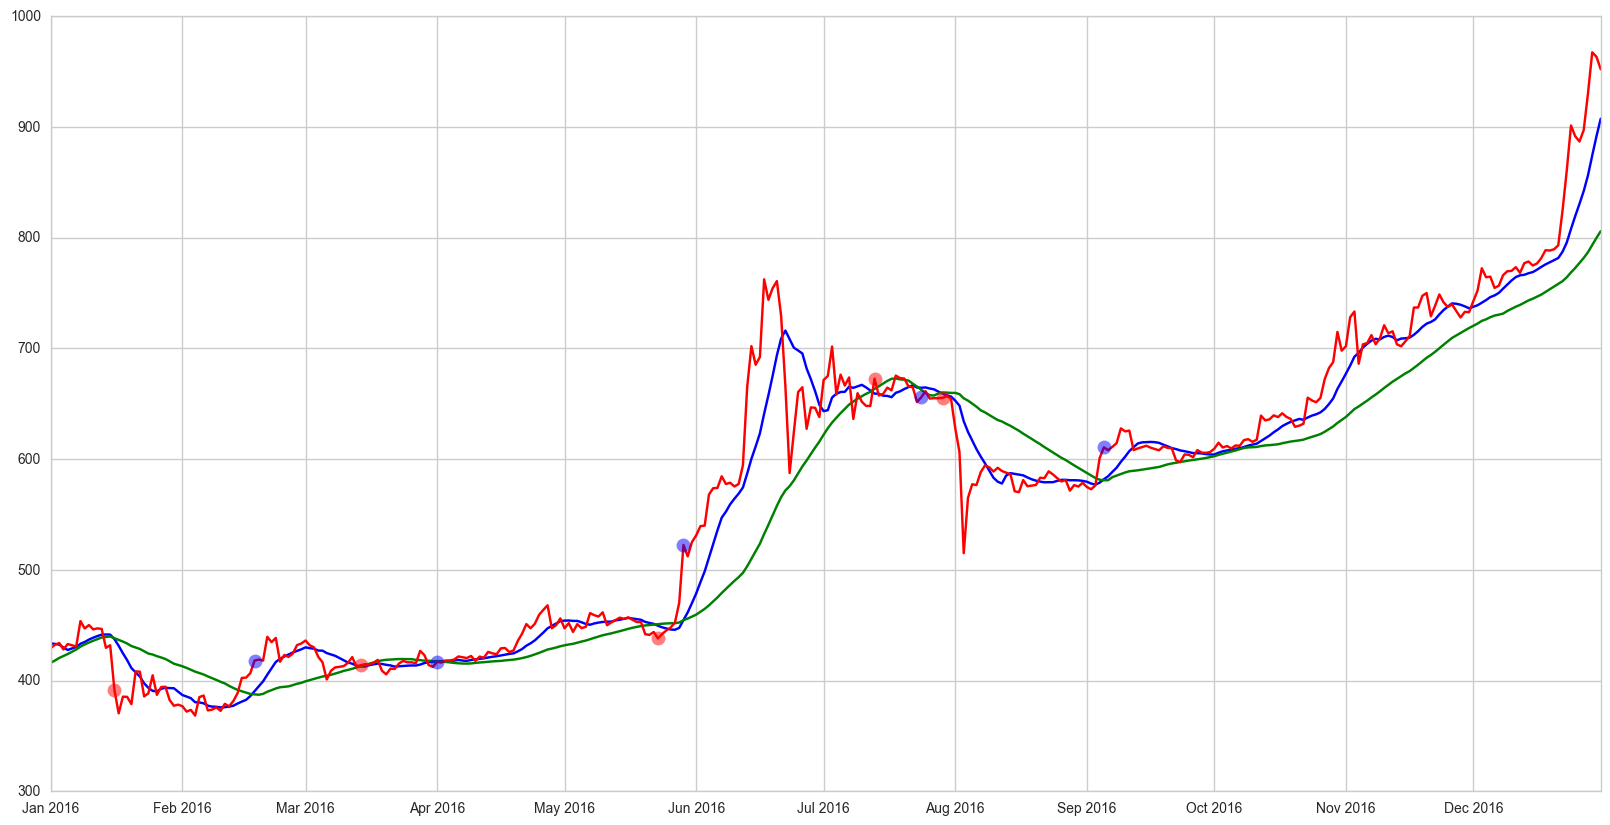

In [358]:
data_plot = df.dropna().ix[start_date:end_date, ['MA_short', 'MA_long', 'Value', 'macd_buy', 'macd_sell']]
sns.set_style("whitegrid")
plt.figure(figsize=(20,10))
plt.plot(data_plot['MA_short'], color='blue')
plt.plot(data_plot['MA_long'], color='green')
plt.plot(data_plot['Value'], color='red')
plt.plot(data_plot.loc[data_plot['macd_buy'] != 0, 'macd_buy'], marker='o', alpha=.5, ms=10, ls=' ', color='blue')
plt.plot(data_plot.loc[data_plot['macd_sell'] != 0, 'macd_sell'], marker='o', alpha=.5, ms=10, ls=' ', color='red')
# plt.xlim((0,4000))
plt.show()

In [ ]:
# 